# Observations for the night February 17th 2021

https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with wl_2021_02
- use jupyter kernel LSST
- requires the installation https://github.com/mfisherlevine/summit
- requires to write in file {HOME}/notebooks/.user_setups


In [95]:
#!/bin/sh
# This file is expected to be found in ${HOME}/notebooks/.user_setups
#  It is a shell fragment that will be sourced during kernel startup
#  when the LSST kernel is started in a JupyterLab environment.  It runs
#  in the user context and can contain arbitrary shell code.  Exported changes
#  in its environment will persist into the JupyterLab Python environment.

#    setup -j rapid_analysis -r ${HOME}/repos/rapid_analysis
#    setup -j atmospec       -r ${HOME}/repos/atmospec

In [96]:
! eups list -s

afw                   21.0.0-7-g484459ba0+ec3713772a 	current w_2021_02 setup
alert_packet          master-g9c6f3ccb69 	current w_2021_02 setup
ap_association        21.0.0-3-g88e2395+3185591824 	current w_2021_02 setup
ap_pipe               21.0.0-8-ga29d378+1e78883ff8 	current w_2021_02 setup
ap_verify             21.0.0-8-ge08b8c0+00a3cd4381 	current w_2021_02 setup
astro_metadata_translator 0.1.0-18-g39729a3+2c88556dba 	current w_2021_02 setup
astshim               21.0.0-2-g45278ab+1b62c9342b 	current w_2021_02 setup
atmospec              LOCAL:/home/dagoret/repos/atmospec 	setup
base                  21.0.0-3-g5051ac2+1b62c9342b 	current w_2021_02 setup
cbp                   21.0.0-2-g143869c+68734f91bf 	current w_2021_02 setup
coadd_utils           21.0.0-2-g7f82c8f+0fa6211a2a 	current w_2021_02 setup
cp_pipe               21.0.0-5-gb7080ec+be549261b9 	current w_2021_02 setup
ctrl_bps              21.0.0-6-g55737e1+9538d236c5 	current w_2021_02 setup
ctrl_execute          21.0.0

In [97]:
# correct for bug in stack in wl_2021_02
%config IPCompleter.use_jedi=False

# Import

In [190]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

In [99]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

# Logbook with rapid analysis

In [100]:
from lsst.rapid.analysis.nightReport import NightReporter
repoDir='/project/shared/auxTel'
reporter=NightReporter(repoDir,"2021-02-17")

Loaded data for seqNums 1 to 475


In [101]:
reporter.getObservedObjects()

['HR 5862',
 'HD 60517',
 'HD 164461',
 'HD 60753',
 'HD 185975',
 'NGC 4755',
 'HD 149609']

/home/dagoret/repos/rapid_analysis/python/lsst/rapid/analysis/nightReport.py:135: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111, polar=True)


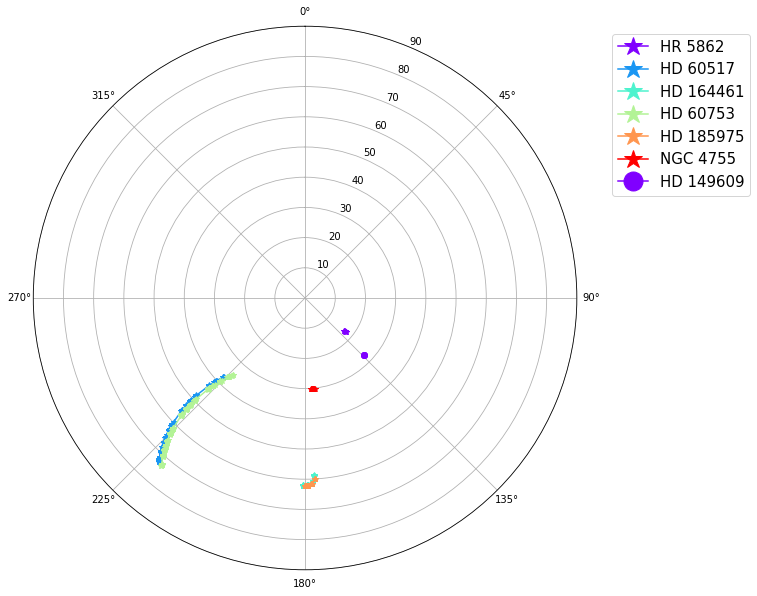

In [102]:
reporter.makePolarPlotForObjects()

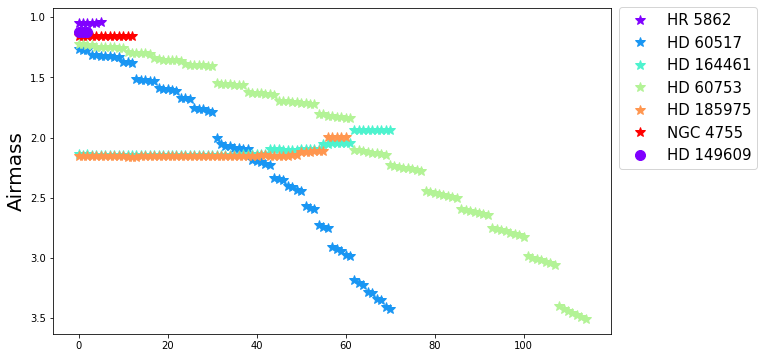

In [103]:
reporter.plotPerObjectAirMass(versusMjd=False)

In [104]:
reporter.printObsTable()

{seqNum:4} {imageType:9} {obj:10} {timeOfDay} {filt:25} {dt.sec:6.1f}  {expTime:2.2f}
   1 bias      azel_target 19:52:33.537 RG610~empty                  0.0  0.00
   2 bias      azel_target 20:06:14.971 RG610~empty                821.4  0.00
   3 bias      azel_target 20:07:00.047 RG610~empty                 45.1  0.00
   4 bias      azel_target 20:07:43.977 RG610~empty                 43.9  0.00
   5 bias      azel_target 20:08:27.986 RG610~empty                 44.0  0.00
   6 bias      azel_target 20:09:11.965 RG610~empty                 44.0  0.00
   7 bias      azel_target 20:09:56.018 RG610~empty                 44.1  0.00
   8 bias      azel_target 20:10:39.990 RG610~empty                 44.0  0.00
   9 bias      azel_target 20:11:22.975 RG610~empty                 43.0  0.00
  10 bias      azel_target 20:12:07.035 RG610~empty                 44.1  0.00
  11 bias      azel_target 20:12:50.020 RG610~empty                 43.0  0.00
  12 bias      azel_target 20:13:34.015 RG610

# Butler

In [105]:
butler=dafPersist.Butler("/project/shared/auxTel")

In [106]:
dayObs="2021-02-17"

In [107]:
all_myseq=[350,351,352,353,354,355,356,357,358]

In [108]:
seqNum=all_myseq[1]

# Display

In [109]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug1_2021_02_17',url=os.environ["FIREFLY_URL"])

In [110]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [111]:
display1.mtv(raw)

In [112]:
display1.getClient().display_url()

# Meta Query to the Butler

In [113]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 31, 34, 33, 27, 29, 28, 32, 30, 44, 42, 41, 35, 38, 39, 43, 36, 40, 37, 45, 46, 47, 49, 50, 56, 48, 54, 57, 55, 52, 53, 51, 65, 63, 67, 61, 62, 66, 64, 59, 58, 60, 68, 69, 74, 76, 75, 72, 73, 70, 71, 78, 77, 80, 79, 81, 83, 82, 85, 84, 86, 90, 88, 89, 87, 92, 93, 91, 95, 94, 96, 102, 100, 97, 99, 101, 98, 108, 105, 104, 103, 111, 106, 109, 107, 112, 110, 114, 113, 116, 115, 117, 118, 120, 122, 121, 119, 123, 126, 125, 130, 129, 127, 128, 124, 134, 133, 131, 135, 132, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [114]:
seqNums=butler.queryMetadata('raw','seqNum',dayObs=dayObs)

In [115]:
%config IPCompleter.use_jedi=False

## Butler Query meta data

In [116]:
ids=butler.queryMetadata('raw',["dayObs", "seqNum"],object='NGC 4755')

In [117]:
count=0
for dataid in ids:
    print(dataid)
    count+=1

('2021-02-17', 347)
('2021-02-17', 348)
('2021-02-17', 349)
('2021-02-17', 350)
('2021-02-17', 351)
('2021-02-17', 352)
('2021-02-17', 353)
('2021-02-17', 355)
('2021-02-17', 354)
('2021-02-17', 356)
('2021-02-17', 357)
('2021-02-17', 358)
('2021-02-17', 359)


# Exp 

In [118]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

NoResults: No locations for get: datasetType:quickLookExp dataId:DataId(initialdata={'dayObs': '2021-02-17', 'seqNum': 351}, tag=set())

In [ ]:
display1.mtv(exp)

In [ ]:
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(131)
ax1.imshow(exp.image.array,origin="lower",cmap="jet")
ax2=fig.add_subplot(132)
ax2.imshow(exp.mask.array,origin="lower",cmap="jet")
ax3=fig.add_subplot(133)
ax3.imshow(exp.variance.array,origin="lower",cmap="jet")

In [ ]:
exp.image.array.shape

In [ ]:
raw.image.array.shape

## Meta Data

In [ ]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [ ]:
md.toDict()

# Start to work on raw images

In [119]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [120]:
all_myseq=[350,351,352,353,354,355,356,357,358]

In [121]:
Ncol=3
Nrow=3

In [122]:
all_my_raw_array=[]
all_my_header=[]
for seqNum in all_myseq:
    raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    all_my_raw_array.append(np.copy(raw.image.array))
    all_my_header.append(md.toDict())

Ncol=3
Nrow=3
Ntot=Ncol*Nrow

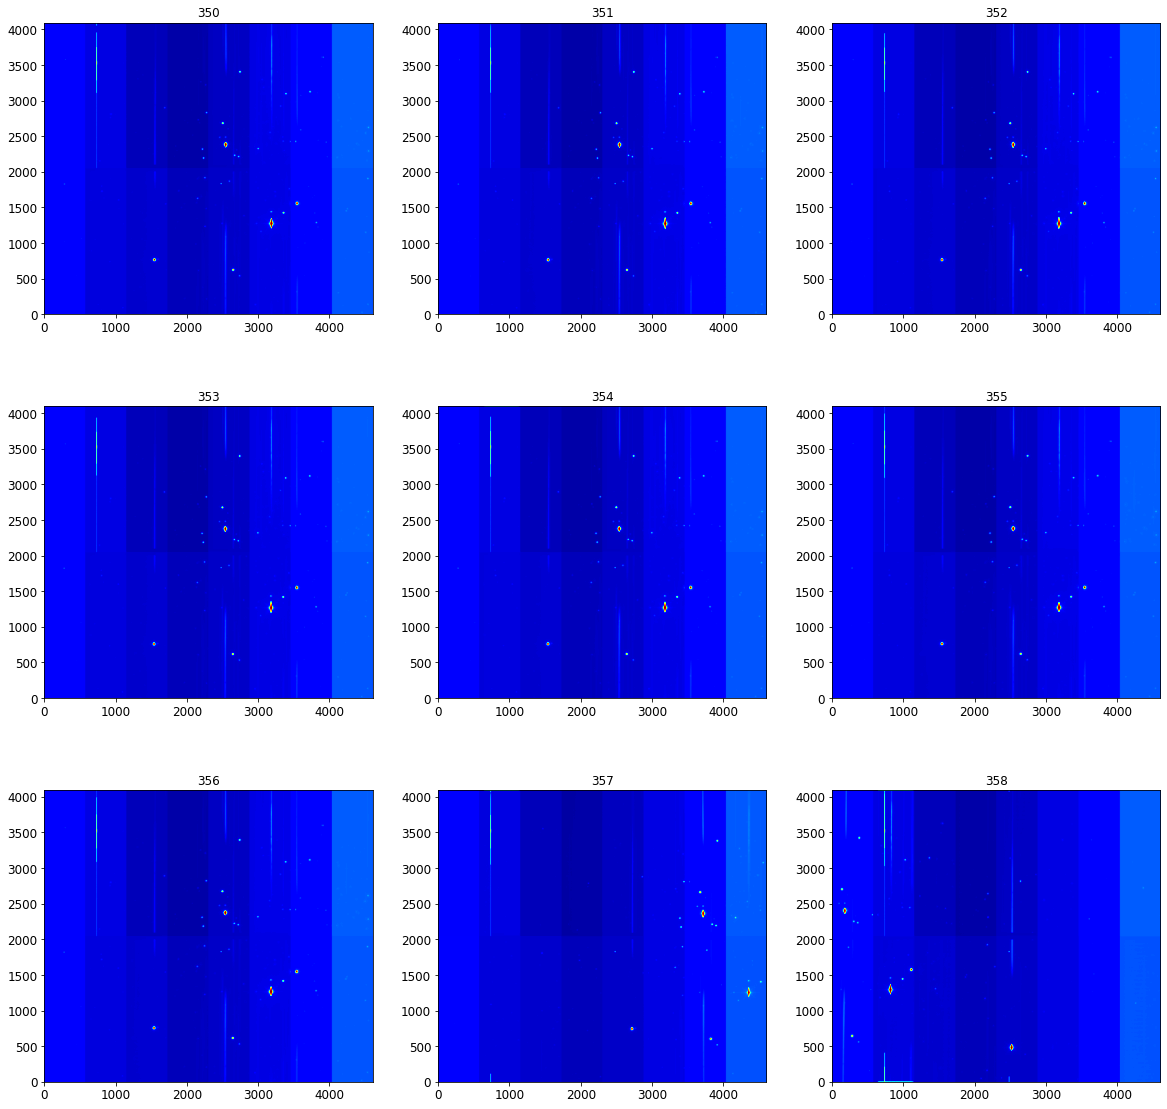

In [189]:
fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx])

In [180]:
img_cut1=all_my_raw_array[0][0:2000,:]
img_cut2=all_my_raw_array[0][2001:2097,:]
img_cut3=all_my_raw_array[0][2097:,:]

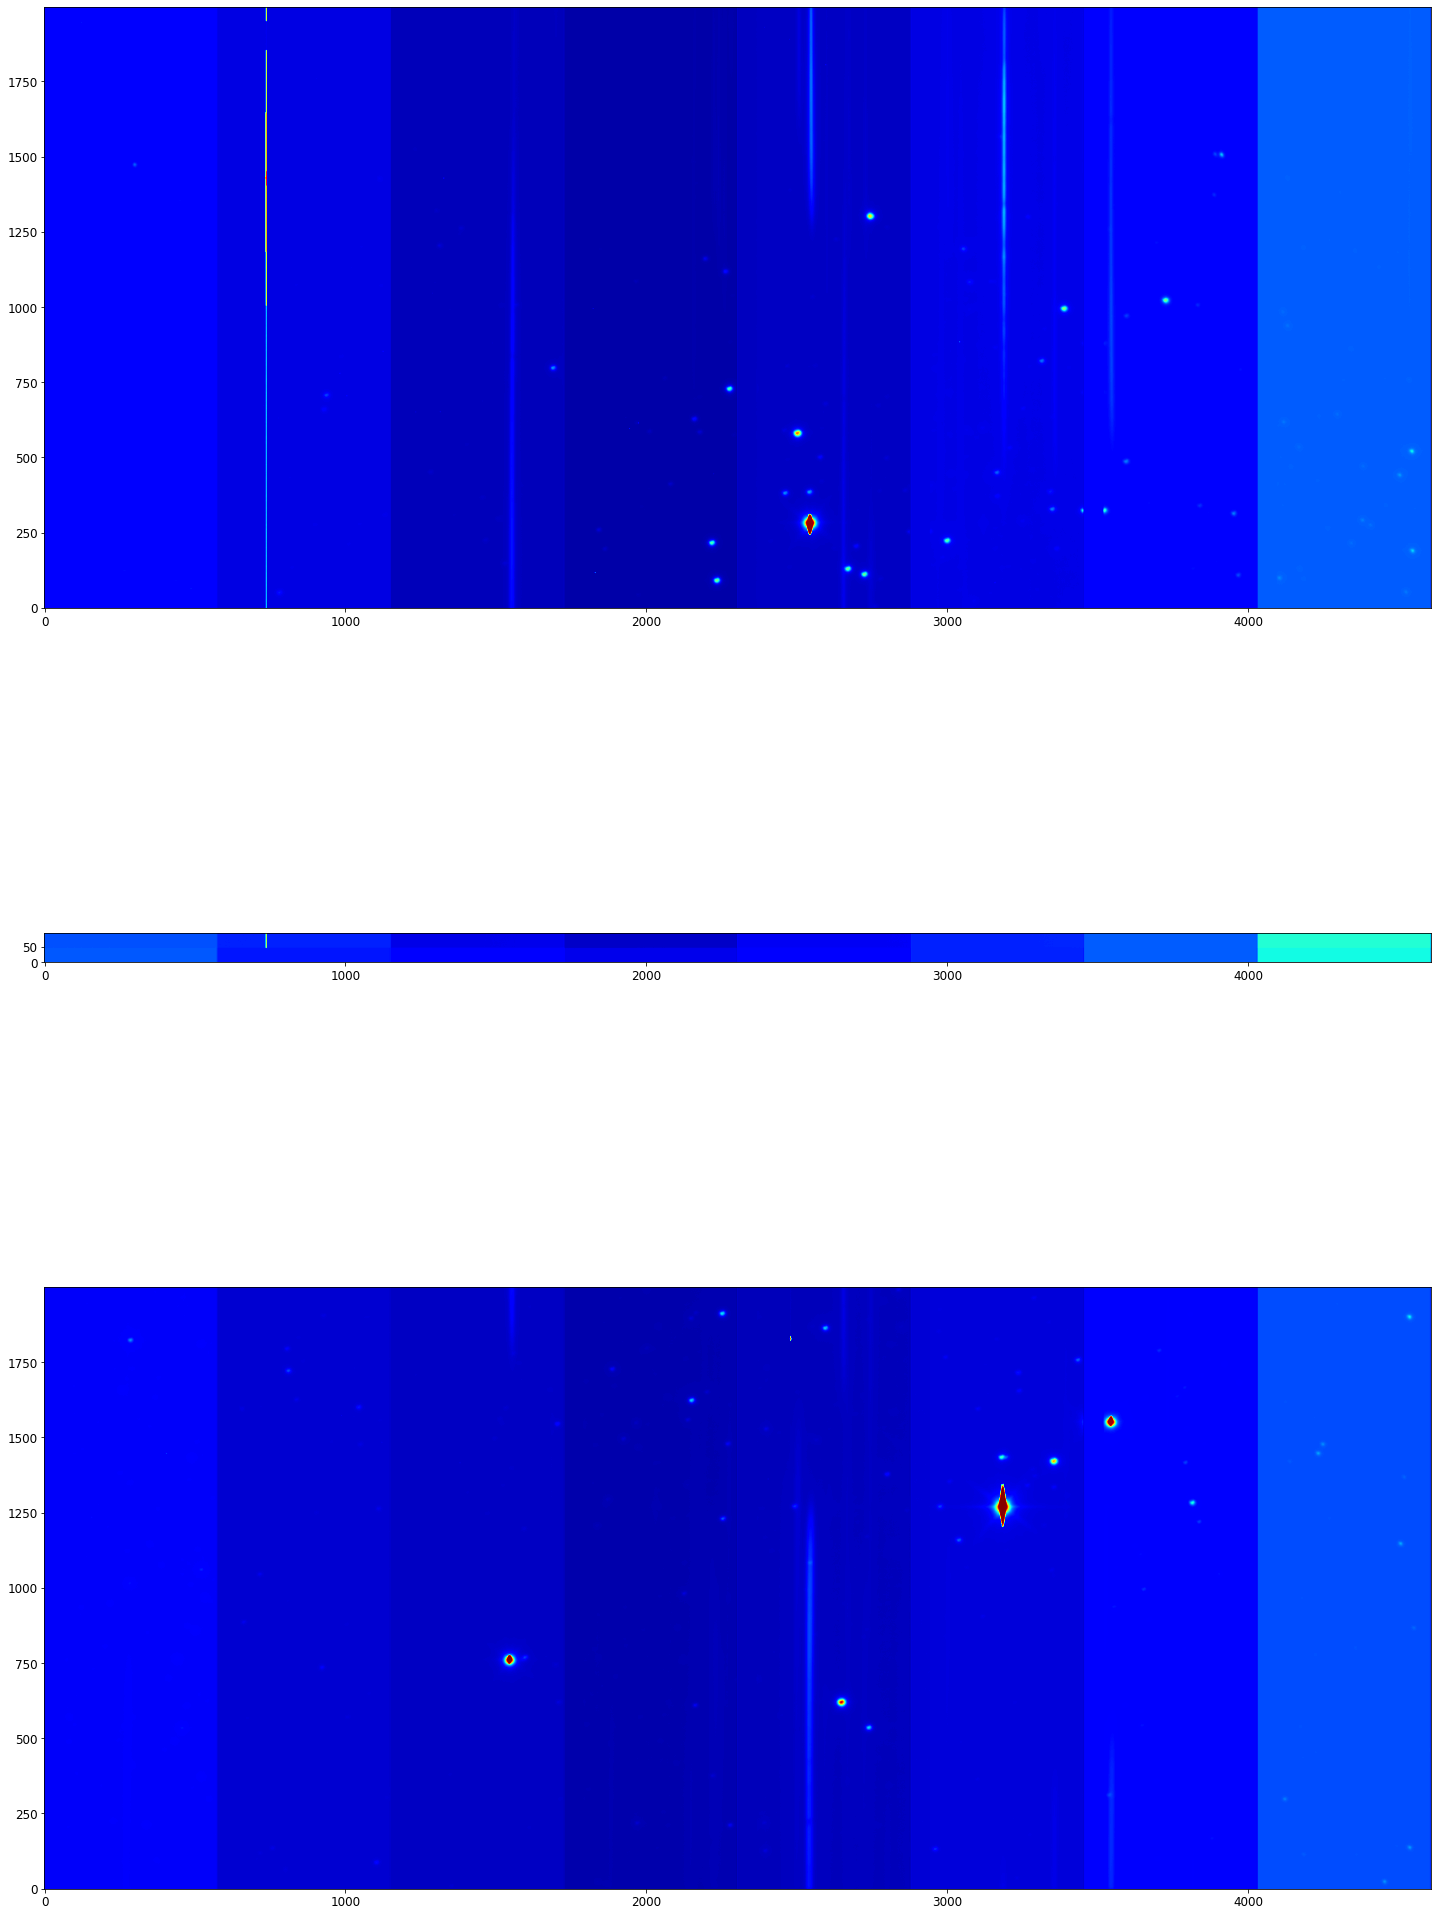

In [185]:

fig=plt.figure(figsize=(20,30))
ax=fig.add_subplot(311)
ax.imshow(img_cut3,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(312)
ax.imshow(img_cut2,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(313)
ax.imshow(img_cut1,origin='lower',cmap="jet",norm=LogNorm())

plt.tight_layout()

In [139]:
Y_profile=np.sum(img_cut,axis=1)
X_profile=np.sum(all_my_raw_array[0],axis=1)

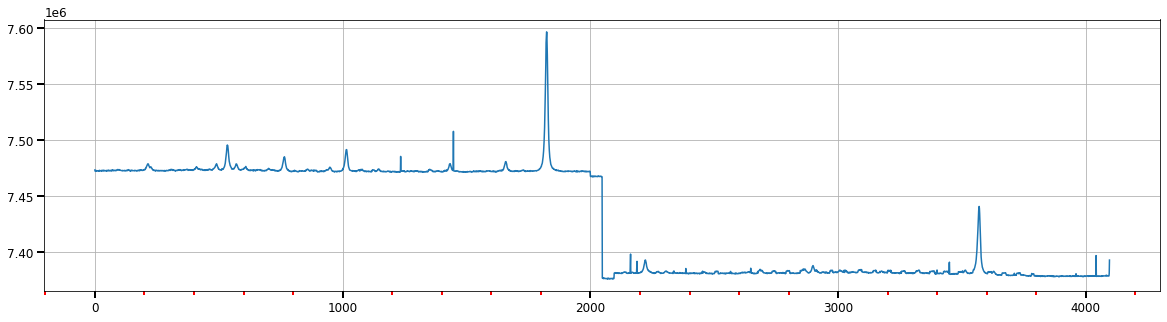

In [172]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

ax.plot(Y_profile)
ax.grid()


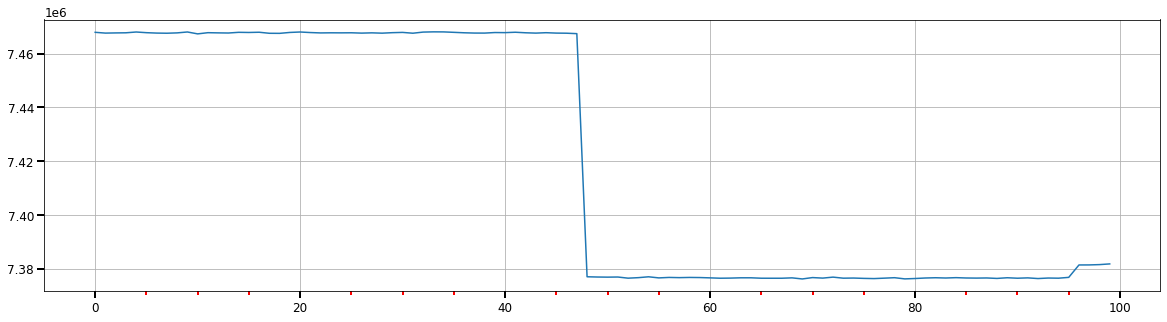

In [175]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
fig=plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)

ax.plot(Y_profile[2000:2100])
ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

ax.grid()

In [176]:
img_cut1=all_my_raw_array[0][0:2001,:]
img_cut2=all_my_raw_array[0][2001:2096,:]
img_cut3=all_my_raw_array[0][2097:,:]

In [177]:
cut_image = []
for image in all_my_raw_array:
    img_cut1=image[0:2001,:]
    img_cut2=image[2001:2096,:]
    img_cut3=image[2097:,:]
    
    stack=np.vstack((img_cut1,img_cut3))
    
    cut_image.append(stack) 
    
    

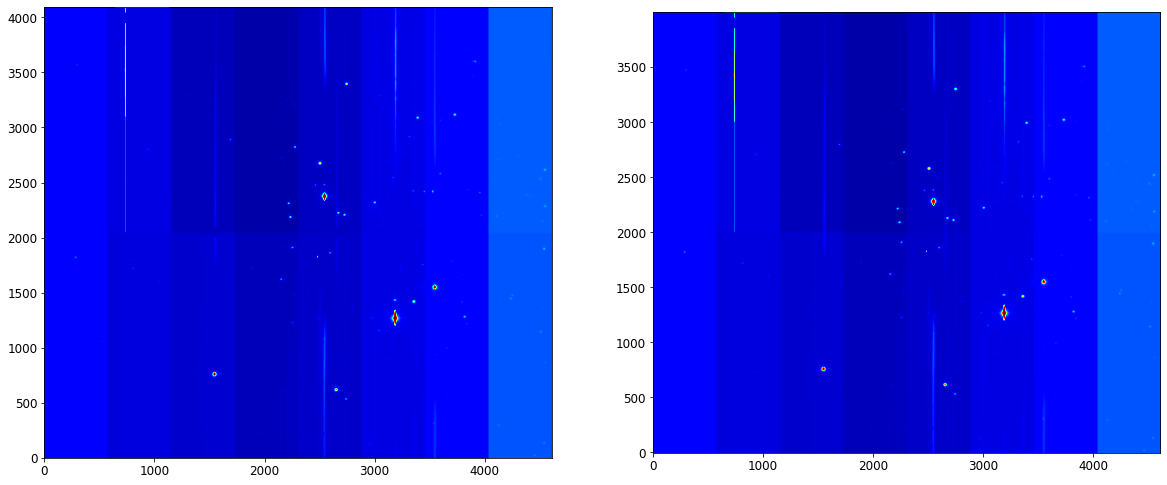

In [178]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
plt.imshow(all_my_raw_array[0],origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(122)
plt.imshow(cut_image[0],origin='lower',cmap="jet",norm=LogNorm())

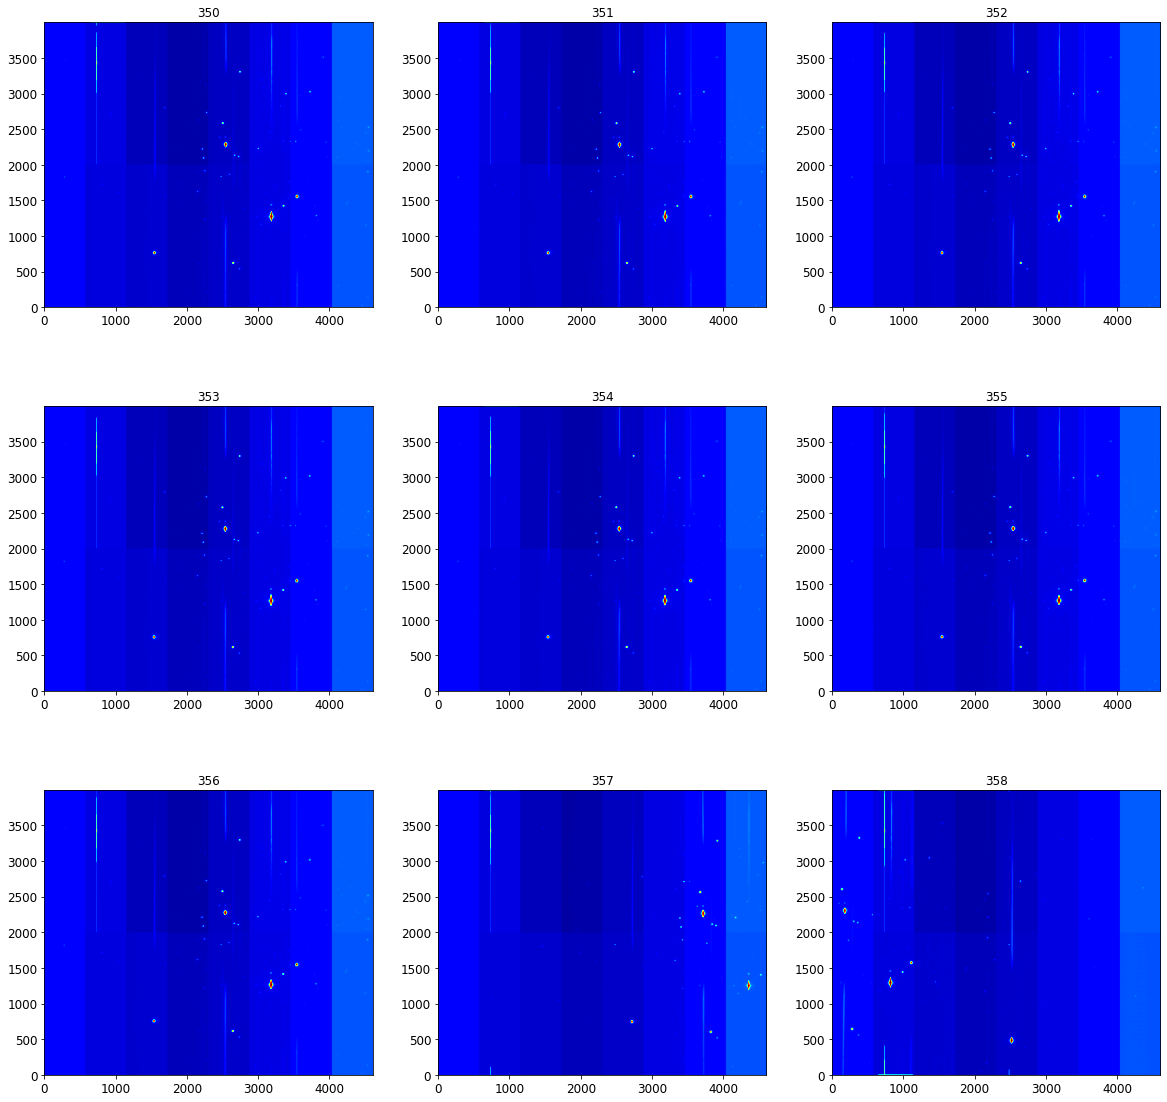

In [188]:
fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(cut_image[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx])

In [191]:
from astropy.io import fits

In [ ]:
idx=0
for seqNum in all_myseq:
    filename="holo4_003_NGC4755_"+dayObs+"_"+str(seqNum)+"_noheader.fits"
    print(filename)
    
    hdr = fits.Header()
    
    for key,value in all_my_header[idx].items():
        hdr[str(key)]=value
        
    #hdu = fits.PrimaryHDU(data=all_my_raw_array[idx],header=hdr)  # with headers
    hdu = fits.PrimaryHDU(data=all_my_raw_array[idx])
    
    hdul = fits.HDUList([hdu])
    
    hdul.writeto(filename,overwrite=True)
    
    idx+=1

In [179]:
idx=0
for seqNum in all_myseq:
    filename="holo4_003_NGC4755_"+dayObs+"_"+str(seqNum)+"_noheader_cut.fits"
    print(filename)
    
    hdr = fits.Header()
    
    for key,value in all_my_header[idx].items():
        hdr[str(key)]=value
        
    #hdu = fits.PrimaryHDU(data=all_my_raw_array[idx],header=hdr)
    hdu = fits.PrimaryHDU(data=cut_image[idx])
    
    hdul = fits.HDUList([hdu])
    
    hdul.writeto(filename,overwrite=True)
    
    idx+=1

holo4_003_NGC4755_2021-02-17_350_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_351_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_352_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_353_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_354_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_355_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_356_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_357_noheader_cut.fits
holo4_003_NGC4755_2021-02-17_358_noheader_cut.fits
